In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:

(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
Y_train[0:5]
#first 5 lables of training samples

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:

def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])
    plt.axis("off")  # Hide axes for better visualization
    plt.show()

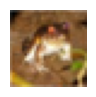

In [9]:
plot_sample(0)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship"]

In [13]:
classes[Y_train[3][0]]

'deer'

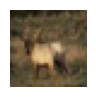

In [15]:
plot_sample(3)      #as the class says..its a deer.

In [33]:
#scaling
#I'm scalling with 255 because RGB image have (255 255 255) array
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [18]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
Y_train_catagorical = keras.utils.to_categorical(
    Y_train, num_classes = 10
)
Y_train_catagorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (32,32,3)),      #input layer
    keras.layers.Dense(3000,activation = "relu"),        #hidden layer with (3000) a random value
    keras.layers.Dense(3000,activation = "relu"),        #hidden layer with (3000) a random value
    keras.layers.Dense(10,activation = "sigmoid")
])

model.compile(optimizer='SGD',             #because my dataset is bigger
              loss='categorical_crossentropy',        #because I'm not using Y-train with discrete vates[6,9,9,4,1....], i'm using y_train catagorical.
                                                      #Y_train(discrete)= sparse_catagorical_crossentropy, Y_train_catagorical = catagorical_crossentropy.
              metrics=['accuracy'])

model.fit(X_train_scaled,Y_train_catagorical,epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.3045 - loss: 1.9291
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4204 - loss: 1.6455
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4585 - loss: 1.5439
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.4780 - loss: 1.4794
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4973 - loss: 1.4285
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5117 - loss: 1.3880
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5273 - loss: 1.3523
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5392 - loss: 1.3068
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5479 - loss: 1.2809
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5653 - loss: 1.2488
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5782 - loss: 1.21

In [31]:
Y_test[0][0]

3

In [32]:
classes[Y_test[0][0]]

'cat'

In [34]:
model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[1.2531984e-01, 6.0665160e-01, 8.1467247e-01, ..., 1.6732381e-05,
        9.4338995e-01, 2.5731054e-01],
       [9.8052245e-01, 9.9995518e-01, 1.6650772e-01, ..., 3.1683195e-02,
        9.9999994e-01, 9.9986535e-01],
       [9.9923432e-01, 9.8076946e-01, 1.0921730e-01, ..., 9.9573523e-01,
        9.9838227e-01, 9.9685669e-01],
       ...,
       [2.6200348e-01, 1.5927777e-05, 9.9997205e-01, ..., 8.6991203e-01,
        2.8970513e-01, 3.4544080e-02],
       [3.8053411e-01, 9.8515593e-02, 9.3190014e-01, ..., 6.2726939e-01,
        2.6433406e-02, 2.6003714e-04],
       [1.6379016e-02, 1.2120093e-03, 9.7779214e-01, ..., 9.9949956e-01,
        5.4317351e-02, 1.3408017e-01]], dtype=float32)

In [35]:
model.predict(X_test_scaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([1.2531984e-01, 6.0665160e-01, 8.1467247e-01, 9.9987030e-01,
       9.9201274e-01, 8.9543784e-01, 3.8005349e-03, 1.6732381e-05,
       9.4338995e-01, 2.5731054e-01], dtype=float32)

In [36]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


3

In [37]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


'cat'